# Bigmart data set form analytics vidhya
    

# Importing library

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### changing working directory ###

In [3]:
pwd#present working directory

'C:\\Users\\Bharanitharan'

In [4]:
os.chdir('E:\\big mart')

In [5]:
pwd # woking irectory changed

'E:\\big mart'

# Importing Data set

In [6]:
test = pd.read_csv('test_t02dQwI.csv')
train = pd.read_csv('train_kOBLwZA.csv')
train.head()
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Treating missing values

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.corr() ### calcuating correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


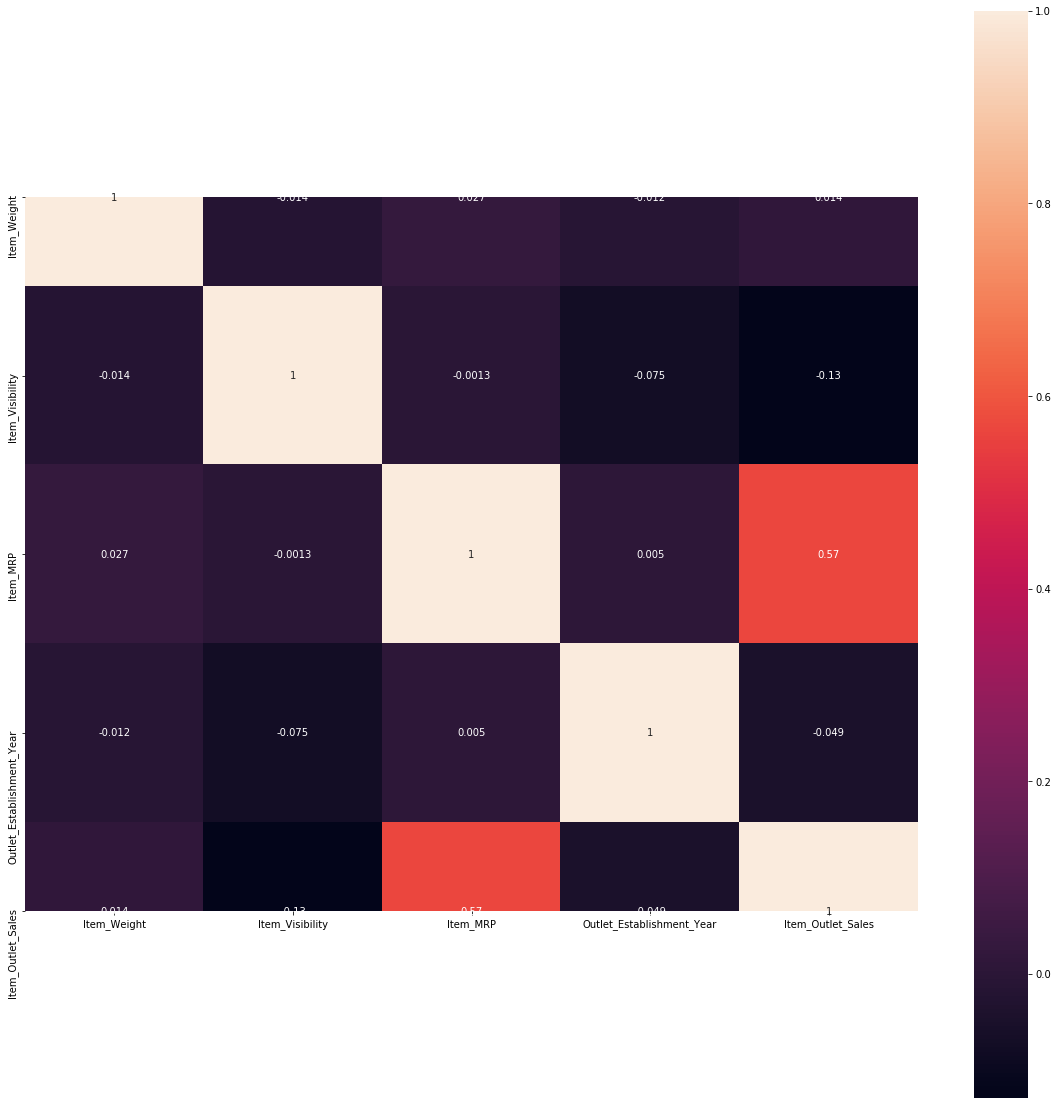

In [10]:
#now plot correlation matrix
correl=train.corr()
ax=plt.subplots(figsize=(20,20))
sns.heatmap(correl,vmax=1,square=True,annot = True)

    we conclude that item weight has no much correleation with other variable so imputeing missing values with Mean

In [11]:
train['Item_Weight'] =train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 ### Solve inconsistency 

In [13]:
train['Item_Fat_Content'].value_counts()  #values need to be changed

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [15]:
train['Item_Fat_Content'].value_counts() 

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
pd.crosstab(train['Outlet_Size'],train['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Outlet_Size,,
High,606,326
Medium,1799,994
Small,1550,838


In [17]:
pd.crosstab(train['Outlet_Size'].isnull(),train['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Outlet_Size,,
False,3955,2158
True,1562,848


In [18]:
pd.crosstab(train['Item_Type'],train['Outlet_Size'])

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,187
Breads,25,83,71
Breakfast,13,36,30
Canned,65,217,189
Dairy,80,218,198
Frozen Foods,92,274,249
Fruits and Vegetables,142,413,328
Hard Drinks,23,75,50
Health and Hygiene,61,170,136


In [19]:
pd.crosstab(train['Item_Type'],train['Outlet_Size'].isnull())

Outlet_Size,False,True
Item_Type,,
Baking Goods,463,185
Breads,179,72
Breakfast,79,31
Canned,471,178
Dairy,496,186
Frozen Foods,615,241
Fruits and Vegetables,883,349
Hard Drinks,148,66
Health and Hygiene,367,153


In [20]:
pd.crosstab(train['Outlet_Identifier'],train['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Identifier,,,
OUT013,932,0,0
OUT018,0,928,0
OUT019,0,0,528
OUT027,0,935,0
OUT035,0,0,930
OUT046,0,0,930
OUT049,0,930,0


In [21]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [22]:
pd.crosstab(train['Outlet_Identifier'],train['Outlet_Size'].isnull())

Outlet_Size,False,True
Outlet_Identifier,,
OUT010,0,555
OUT013,932,0
OUT017,0,926
OUT018,928,0
OUT019,528,0
OUT027,935,0
OUT035,930,0
OUT045,0,929
OUT046,930,0


In [23]:
tbl=pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])

In [24]:
tbl

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [25]:
pd.crosstab(train['Outlet_Size'].isnull(),train['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Outlet_Size,,
False,3955,2158
True,1562,848


In [26]:
tbl=pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])

In [27]:
tbl

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [28]:
tblmissing=pd.crosstab(train['Outlet_Size'].isnull(),train['Outlet_Location_Type'])

In [29]:
tblmissing

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
False,2388,930,2795
True,0,1855,555


#### Found that missing values only in grosary store and it is all small size and all other missing values are in tier 2 and it has also small shops only so imputing with small

In [30]:
train['Outlet_Size'] = train['Outlet_Size'].fillna("Small")

In [31]:
train['Outlet_Size'].isnull().sum()

0

In [32]:
train['Outlet_Size'].value_counts() 

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [33]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### PREPROCESSING OF DATA(Bi-Variate)

In [34]:
from scipy.stats import chi2_contingency#importing for chi-square

In [35]:
categorical_feature_mask = test.dtypes==object

In [36]:
categorical_feature_mask

Item_Identifier               True
Item_Weight                  False
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                     False
Outlet_Identifier             True
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
dtype: bool

In [37]:
tbl = pd.crosstab(train['Outlet_Size'],train['Item_Fat_Content'])

In [38]:
chi1=  chi2_contingency(tbl) 

In [39]:
chi1

(0.19486190434458034,
 0.9071649771643981,
 2,
 array([[ 603.29039071,  328.70960929],
        [1807.92925026,  985.07074974],
        [3105.78035903, 1692.21964097]]))

In [40]:
tb2 = pd.crosstab(train['Outlet_Size'],train['Item_Type'])

In [41]:
chi2=  chi2_contingency(tb2) 
print(chi2)

(10.050684319204635, 0.9997615153883294, 30, array([[ 70.85955649,  27.44714302,  12.02862842,  70.96890766,
         74.57749619,  93.60459932, 134.72063827,  23.40114983,
         56.86260706,  99.50956236,  46.47424616,  18.4803473 ,
          6.99847472, 131.22140092,  48.66126951,  16.18397278],
       [212.35058078,  82.2530799 ,  36.04716649, 212.67828229,
        223.49243224, 280.5124956 , 403.7282647 ,  70.1281239 ,
        170.40478705, 298.20837733, 139.27314326,  55.38155579,
         20.97289687, 393.24181626, 145.82717353,  48.49982401],
       [364.78986272, 141.29977707,  61.92420509, 365.35281004,
        383.93007157, 481.88290508, 693.55109703, 120.47072627,
        292.73260589, 512.28206031, 239.25261058,  95.13809691,
         36.02862842, 675.53678282, 250.51155696,  83.31620321]]))


### PREPROCESSING OF DATA(Uni-Variate)

In [42]:
train.skew(axis=0)

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

#### Lable encoder

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
def categorical_variable(dataframe):
    variable_name=[i for i in dataframe.columns if dataframe.dtypes[i]=='object']
    for x in variable_name:
        dataframe[x]=le.fit_transform(dataframe[x])
    return dataframe


In [45]:
categorical_variable(train)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


#### spliting a train data base into train and test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
Y = train['Item_Outlet_Sales']

In [48]:
X = train.iloc[:,0:11]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

Train data has now splited into train and test to see model acuracy and after checking that we use that in validation data set

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
Lr = LinearRegression()

In [52]:
Lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
preds = Lr.predict(x_train)

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [55]:
rmse = sqrt(mean_squared_error(y_train, preds))
print(rmse)

1208.2798501727814
